# Using SVM and SVC with kernel RBF on MNIST Dataset 

### Given Instructions

In [1]:
# Train a linear SVM and a kernel (RBF) SVM classifier on the MNIST dataset. Since SVM classifiers are
# binary classifiers, you will need to use one-versus-all to classify all 10 digits.
# What accuracy can you reach?
# Your python program should be commented, and structured. Please place your file(.ipynb) in a
# directory named after you, zip it and submit it to canvas.
# Projects that are demonstrated successfully live during class (at the end of class, last 15 mins of lecture)
# will receive an immediate score of 100%.

# Project

In [2]:
#First we import the MNIST dataset and split into train/test
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Data Visualization

In [3]:
print(x_train.shape)
print(type(x_train))
print(x_train)

(60000, 28, 28)
<class 'numpy.ndarray'>
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


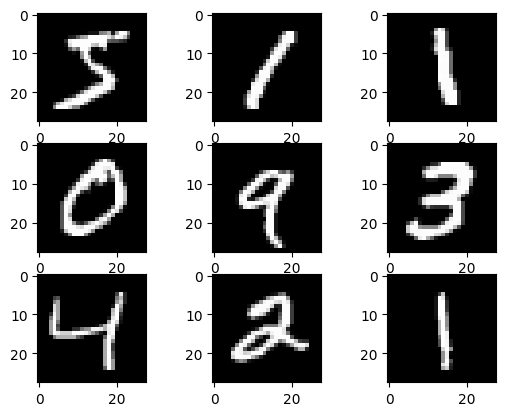

In [4]:
#Let's plot 9 images from Training Set

import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,3)

for i in range(0, 9):
    if i < 3:
        # This piece of code:
        # cmap=plt.get_cmap('gray')
        # converts the image to grayscale
        axs[i % 3, 0].imshow(x_train[i], cmap=plt.get_cmap('gray'))
    elif i < 6:
        axs[i % 3, 1].imshow(x_train[i], cmap=plt.get_cmap('gray'))
    else:
        axs[i % 3, 2].imshow(x_train[i], cmap=plt.get_cmap('gray'))

plt.show()

## Linear SVM

### Without Pipeline and Grid Search

In [5]:
#reshape for model creation
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

In [6]:
from sklearn import svm

#create linear SVM as `clf`

# the code
# `dual = False`
# is used when the # of samples is > the number of features
# i.e. 60,000 data samples/tuples > 28*28 features (length x width of each image)
# #     60,000 > 784 

clf = svm.LinearSVC(dual=False)

#train model
clf.fit(x_train, y_train)

LinearSVC(dual=False)

In [7]:
#test model and obtain prediction as `y_pred`
y_pred = clf.predict(x_test)

#Evaluation Metrics
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average = 'macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average = 'macro'))
print("F1-Score:", metrics.f1_score(y_test, y_pred, average = 'macro'))

Accuracy: 0.9168
Precision: 0.9155450022414267
Recall: 0.9156542231276058
F1-Score: 0.9154754461360797


### With Pipeline and Grid Search

In [8]:
#Let's try using pipeline now:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', svm.LinearSVC(dual = False, max_iter = 5000))
])

params = {
    'classifier__C' : [1, 0.1, 0.01, 0.001]
}

gridS = GridSearchCV(pipeline, params, cv=5, n_jobs = -1, verbose = 4)

gridS.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('classifier',
                                        LinearSVC(dual=False, max_iter=5000))]),
             n_jobs=-1, param_grid={'classifier__C': [1, 0.1, 0.01, 0.001]})

In [9]:
#display best C found, as well as the Model
bestC = gridS.best_params_
bestModel = gridS.best_estimator_

print(bestC, bestModel)

{'classifier__C': 0.1} Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', LinearSVC(C=0.1, dual=False, max_iter=5000))])


In [10]:
#find y_pred and predict against test set
new_y_pred = bestModel.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, new_y_pred))
print("Precision:", metrics.precision_score(y_test, new_y_pred, average = 'macro'))
print("Recall:", metrics.recall_score(y_test, new_y_pred, average = 'macro'))
print("F1-Score:", metrics.f1_score(y_test, new_y_pred, average = 'macro'))

#Notice that this new model yields higher evalution metric values

Accuracy: 0.9182
Precision: 0.917072335740215
Recall: 0.9169961664788884
F1-Score: 0.9168883105285737


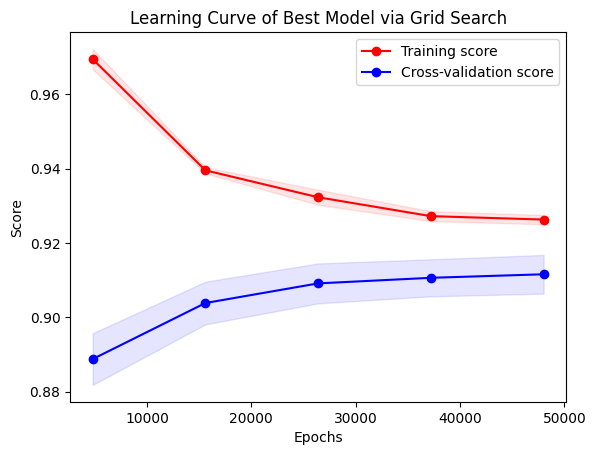

In [11]:
#plot for over/underfitting
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

#obtain vals for plotting
train_sizes, train_scores, test_scores = learning_curve(bestModel, x_train, y_train, cv=5, n_jobs=-1)

#calculate Mean and Std for plotting on both train and test scores
trainMean = np.mean(train_scores, axis=1)
trainStd = np.std(train_scores, axis=1)
testMean = np.mean(test_scores, axis=1)
testStd = np.std(test_scores, axis=1)

#plot the avg (line + points) and std (shaded regions around lines)

#labels
plt.figure()
plt.title("Learning Curve of Best Model SVM Linear via Grid Search")
plt.xlabel("Epochs")
plt.ylabel("Score")

#shaded regions
plt.fill_between(train_sizes, trainMean - trainStd, trainMean + trainStd, alpha=0.1, color="r")
plt.fill_between(train_sizes, testMean - testStd, testMean + testStd, alpha=0.1, color="b")

#lines
plt.plot(train_sizes, trainMean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, testMean, 'o-', color="b", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

#The model seems to be doing just fine
#No visible over/underfitting. They converge to around 0.92 ~ 92% acc

## Kernel RBF SVM

### Without Pipeline and GridSearch

In [12]:
#reload the x_train/test and y_train/test for eval metrics
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#reshape for model creation
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

In [13]:
rbfModel = svm.SVC(kernel = 'rbf', max_iter = 5000)

rbfModel.fit(x_train, y_train)

SVC(max_iter=5000)

In [14]:
#test model and obtain prediction as `y_pred`
y_pred = clf.predict(x_test)

#Evaluation Metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average = 'macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average = 'macro'))
print("F1-Score:", metrics.f1_score(y_test, y_pred, average = 'macro'))

Accuracy: 0.9168
Precision: 0.9155450022414267
Recall: 0.9156542231276058
F1-Score: 0.9154754461360797


### With Pipeline and GridSearch

In [15]:
#create pipeline and `C` values to use in GridSearch
from sklearn.model_selection import KFold

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', svm.SVC(kernel = 'rbf', cache_size = 2000, gamma = 0.1, max_iter = 5000))
])

params = {
    'classifier__C' : [10, 5],
}

#split into K-Fold with 10,000 data pts for each fold (6 folds)
kf = KFold(n_splits = 6, shuffle = True)

#insert all the above into the gridSearch
gridS = GridSearchCV(pipeline, params, cv = kf, n_jobs = -1, verbose = 4)

gridS.fit(x_train, y_train)

Fitting 6 folds for each of 9 candidates, totalling 54 fits


c:\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=6, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('classifier', SVC(max_iter=5000))]),
             n_jobs=-1,
             param_grid={'classifier__C': [10, 1, 0.1],
                         'classifier__gamma': [10, 1, 0.1]},
             verbose=4)

In [16]:
#display best C found, as well as the Model
bestC = gridS.best_params_
bestModel = gridS.best_estimator_

print(bestC, bestModel)

{'classifier__C': 10, 'classifier__gamma': 0.1} Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', SVC(C=10, gamma=0.1, max_iter=5000))])


In [17]:
#find y_pred and predict against test set
new_y_pred = bestModel.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, new_y_pred))
print("Precision:", metrics.precision_score(y_test, new_y_pred, average = 'macro'))
print("Recall:", metrics.recall_score(y_test, new_y_pred, average = 'macro'))
print("F1-Score:", metrics.f1_score(y_test, new_y_pred, average = 'macro'))

#Notice that this new model yields higher evalution metric values

Accuracy: 0.9576
Precision: 0.9634399455523018
Recall: 0.957060835242728
F1-Score: 0.9588057358326783


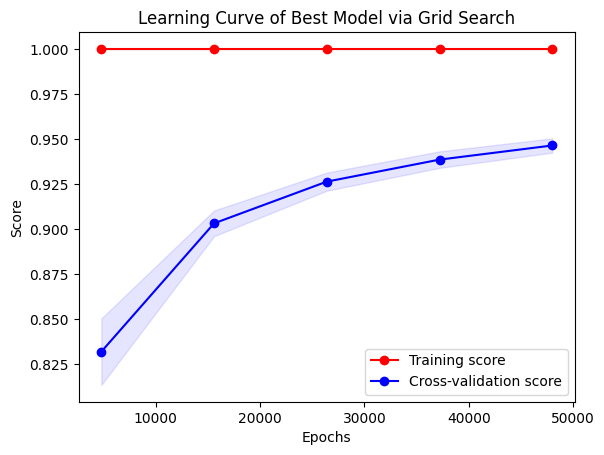

In [18]:
#plot for over/underfitting

#obtain vals for plotting
train_sizes, train_scores, test_scores = learning_curve(bestModel, x_train, y_train, cv=5, n_jobs=-1)

#calculate Mean and Std for plotting on both train and test scores
trainMean = np.mean(train_scores, axis=1)
trainStd = np.std(train_scores, axis=1)
testMean = np.mean(test_scores, axis=1)
testStd = np.std(test_scores, axis=1)

#plot the avg (line + points) and std (shaded regions around lines)

#labels
plt.figure()
plt.title("Learning Curve of Best Model RBF Kernel SVM via Grid Search")
plt.xlabel("Epochs")
plt.ylabel("Score")

#shaded regions
plt.fill_between(train_sizes, trainMean - trainStd, trainMean + trainStd, alpha=0.1, color="r")
plt.fill_between(train_sizes, testMean - testStd, testMean + testStd, alpha=0.1, color="b")

#lines
plt.plot(train_sizes, trainMean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, testMean, 'o-', color="b", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

#Seems to be overfitting, so I've made changes to gamma, cache size, and C to reduce overfitting

In [19]:
from sklearn.model_selection import cross_val_score, KFold

#10,000 data points per fold

kF = KFold(n_splits = 6, shuffle = True)

scores = cross_val_score(bestModel, x_train, y_train, cv = kF, scoring = 'accuracy', n_jobs = -1)

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

c:\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler

Cross-Validation Scores: [0.951  0.9479 0.9562 0.9514 0.9457 0.9488]
Mean Accuracy: 0.9501666666666667
